In [10]:

from analyze import analyze_data
from utils import RequestData
import json
total_requests = 207775
# sampling_rates = [5,10,15,20]
sampling_rates = [5,10,15,20]
# labels = ["aggregation", "mooncake(1p-3d)", "lmcache(1p-3d)"]
labels = ["aggregation", "lmcache(1p-3d)", "lmcache(2p-2d)", "lmcache(3p-1d)"]
rps = [(s*total_requests/100)/3600 for s in sampling_rates]
log_dirs_map = {}
log_dirs_map[labels[0]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-05-26-19-55-57/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-05-26-19-55-57/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-05-26-19-55-57/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-05-26-22-27-34/run_0"
]
log_dirs_map[labels[1]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-07-01-17-19-19/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-16-07-05/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-31-10/run_0", 
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-16-23-35/run_1",
]
log_dirs_map[labels[2]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-44-19/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-44-19/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-44-19/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-44-19/run_3",
]
log_dirs_map[labels[3]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-59-46/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-59-46/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-59-46/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-07-02-22-59-46/run_3",
]
# log_dirs_map[labels[1]] = [
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-21-58-44/run_0",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-21-58-44/run_1",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-12-19/run_0",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-21-58-44/run_3",
# ]



# log_dirs_map[labels[2]] = [
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-28-38/run_0",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-28-38/run_1",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-28-38/run_2",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-28-38/run_3",
# ]

# log_dirs_map[labels[3]] = [
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-44-34/run_0",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-44-34/run_1",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-44-34/run_2",
# "/mnt/network_drive/lrq/logs/logs_2025-06-26-22-44-34/run_3",
# ]


metrics_list = []
requests_list_map = {}
for label, log_dirs in log_dirs_map.items(): 
    requests_list_map[label] = []
    for log_dir in log_dirs:
        report_file_path = analyze_data(log_dir, metrics_list)
        with open(report_file_path, 'r') as f:
            report = json.load(f)

        loadgen_data = report['loadgen_data']
        requests = []
        for request_data in loadgen_data:
            if 'error' not in request_data.keys():
                request = RequestData.init_from_dict(request_data)
                requests.append(request)
                continue
        requests_list_map[label].append(requests)


QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus 

In [11]:

from utils import get_goodput, get_p_ttft, get_p_tpot
percentile = 99
goodputs_map = {}
p_ttfts_map = {}
p_tpots_map = {}


for label, requests_list in requests_list_map.items():
    goodputs_map[label] = []
    p_ttfts_map[label] = []
    p_tpots_map[label] = []
    for requests in requests_list:
        goodput = get_goodput(requests)
        p_ttft = get_p_ttft(requests, percentile)
        p_tpot = get_p_tpot(requests, percentile)

        goodputs_map[label].append(goodput)
        p_ttfts_map[label].append(p_ttft)
        p_tpots_map[label].append(p_tpot)




Text(0, 0.5, 'TPOT(s)')

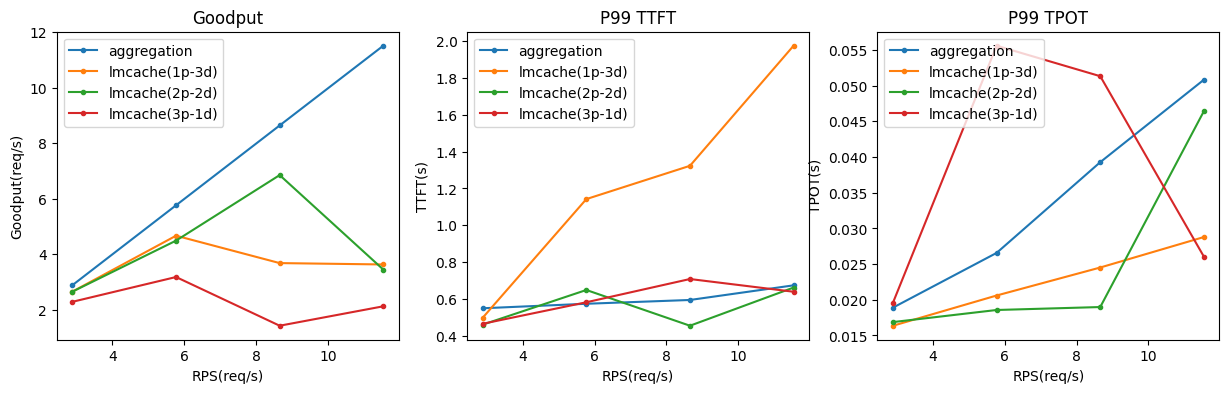

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for label, goodputs in goodputs_map.items():
    axes[0].plot(rps, goodputs, label=label, marker='.')
axes[0].legend()
axes[0].set_title(f"Goodput")
axes[0].set_xlabel(f"RPS(req/s)")
axes[0].set_ylabel(f"Goodput(req/s)")

for label, ttfts in p_ttfts_map.items():
    axes[1].plot(rps, ttfts, label=label, marker='.')
axes[1].legend()
axes[1].set_title(f"P{percentile} TTFT")
axes[1].set_xlabel(f"RPS(req/s)")
axes[1].set_ylabel(f"TTFT(s)")

for label, tpots in p_tpots_map.items():
    axes[2].plot(rps, tpots, label=label, marker='.')
axes[2].legend()
axes[2].set_title(f"P{percentile} TPOT")
axes[2].set_xlabel(f"RPS(req/s)")
axes[2].set_ylabel(f"TPOT(s)")
